# Clustering GMM using sklearn

## BMI Clustering Using Gaussian Mixture Model (GMM)
- Body Mass Index (BMI) is a numerical value calculated using weight (kg) and height (m²)
- BMI is commonly classified into ranges:
1) Underweight: BMI < 18.5
2) Normal weight: 18.5 ≤ BMI < 24.9
3) Overweight: 25 ≤ BMI < 29.9
4) Obese: BMI ≥ 30

## `1` import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from termcolor import colored


## `2` Loading the dataset

In [2]:
data=pd.read_csv('BMI Dataset.csv')

In [3]:
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


## `3` EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
data.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


In [6]:
data.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

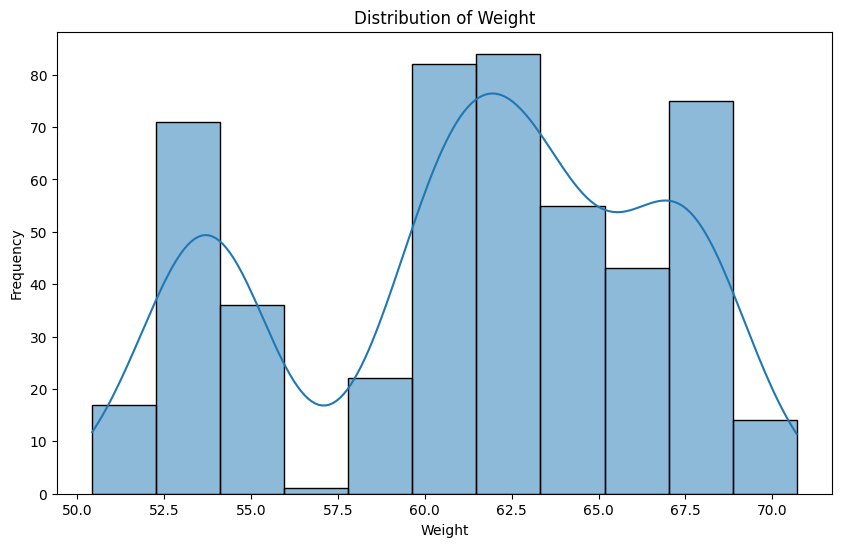

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

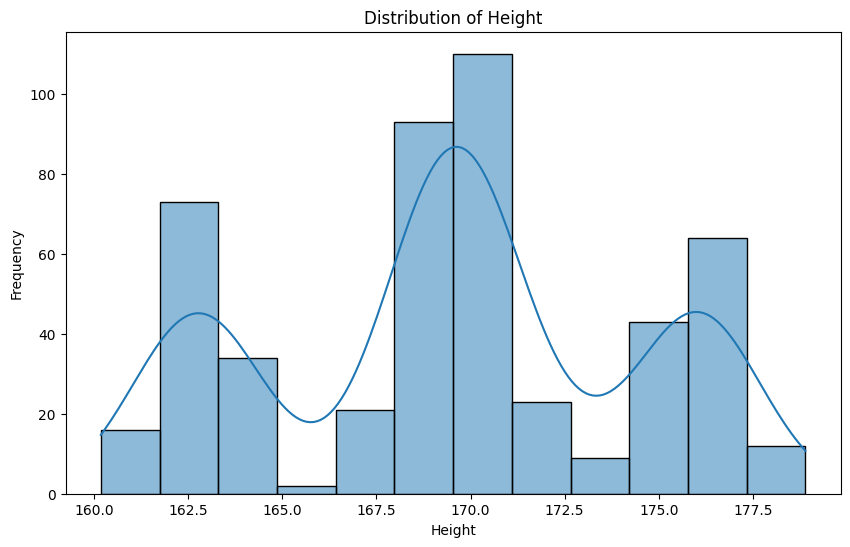

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

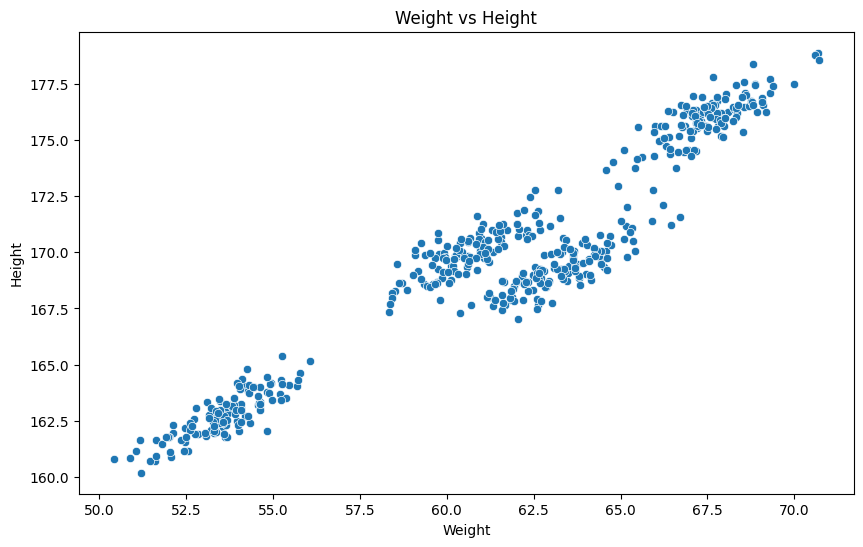

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Weight', y='Height')
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[((data < lower_bound) | (data > upper_bound)).any(axis=1)]

print(f"Original data shape: {data.shape}")
print(f"Number of outliers: {outliers.shape[0]}")

Original data shape: (500, 2)
Number of outliers: 0


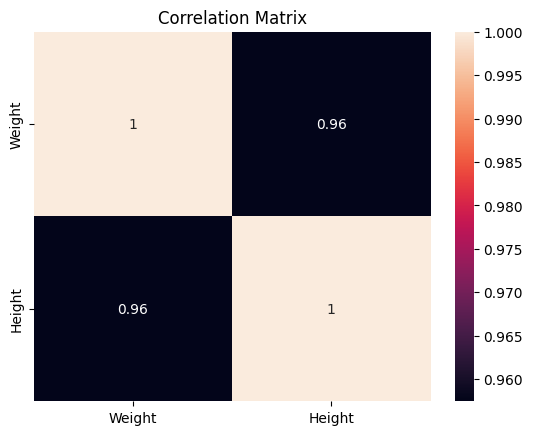

In [12]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

## `4` standardize the data

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## `5` Plot BIC scores to find optimal number of clusters

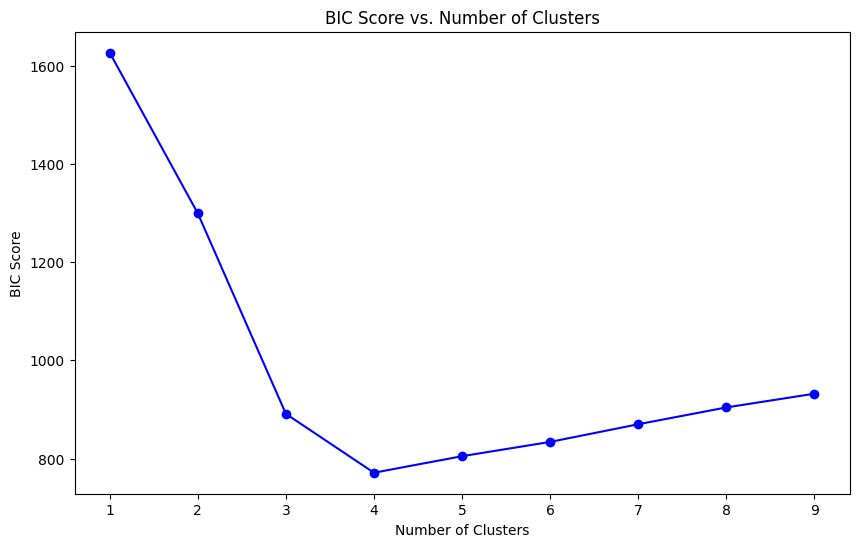

In [14]:
n_clusters = range(1,10)
bic_scores = []

for i in n_clusters:
    gmm = GaussianMixture(n_components=i, random_state=1234)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, bic_scores,'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs. Number of Clusters')
plt.show();

## `6` Fit GMM with the optimal number of clusters

In [36]:
optimal_n_clusters = 4
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=1234)
gmm.fit(data_scaled)
predicted_clusters = gmm.predict(data_scaled)
estimated_means = gmm.means_


## Predicted clusters


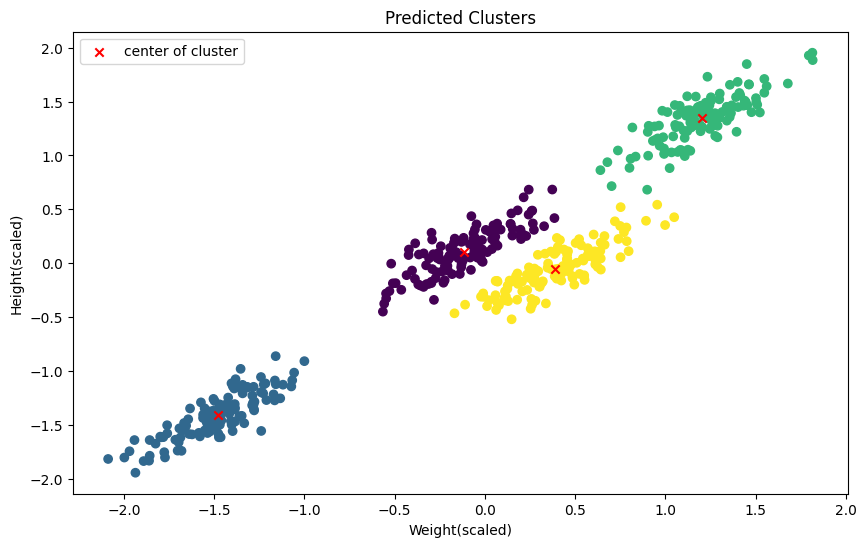

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_clusters)
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], marker='x', color='red',label='center of cluster')
plt.title('Predicted Clusters')
plt.xlabel('Weight(scaled)')
plt.ylabel('Height(scaled)')
plt.legend()
plt.show()

## `7` Visualize the results

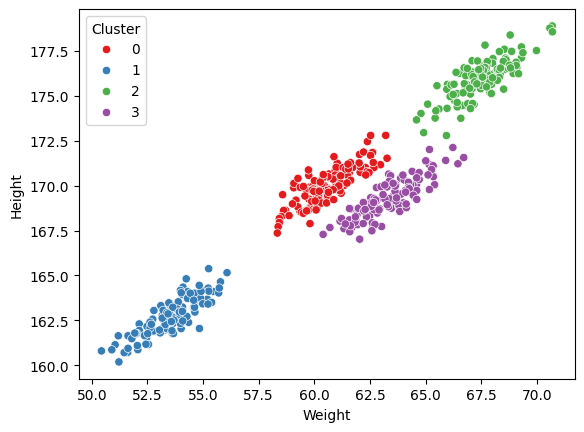

In [17]:
data['Cluster'] = predicted_clusters
sns.scatterplot(data=data, x='Weight', y='Height', hue='Cluster', palette='Set1')
plt.show()

# 

## Describe each cluster

In [18]:

data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2
cluster_names = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C', 3: 'Cluster D'}
data['Cluster'] = data['Cluster'].map(cluster_names)
cluster_stats = data.groupby('Cluster').agg({
    'Weight': ['min', 'max'],
    'Height': ['min', 'max'],
    'BMI': ['min', 'max']
}).round(2)

colored_headers = [colored(header, 'cyan', attrs=['bold']) for header in cluster_stats.columns]
print(tabulate(cluster_stats, headers=colored_headers, tablefmt='simple_grid'))


┌───────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬──────────────────┬──────────────────┐
│           │   ('Weight', 'min') │   ('Weight', 'max') │   ('Height', 'min') │   ('Height', 'max') │   ('BMI', 'min') │   ('BMI', 'max') │
├───────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼──────────────────┼──────────────────┤
│ Cluster A │               58.34 │               63.27 │              167.36 │              172.8  │            20.39 │            21.51 │
├───────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼──────────────────┼──────────────────┤
│ Cluster B │               50.43 │               56.08 │              160.18 │              165.38 │            19.51 │            20.88 │
├───────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼──────────────────┼──────────────────┤
│ Cluster C │       

- Cluster A
1) Weight Range: 58.34 kg – 63.27 kg
2) Height Range: 167.36 cm – 172.8 cm
3) BMI Range: 20.39 – 21.51

- Cluster B
1) Weight Range: 50.43 kg – 56.08 kg
2) Height Range: 160.18 cm – 165.38 cm
3) BMI Range: 19.51 – 20.88

- Cluster C
1) Weight Range: 64.59 kg – 70.7 kg
2) Height Range: 172.79 cm – 178.89 cm
3) BMI Range: 21.26 – 22.28

- Cluster D
1) Weight Range: 60.4 kg – 66.72 kg
2) Height Range: 167.02 cm – 172.12 cm
3) BMI Range: 21.58 – 22.67


# Clustering GMM From Scratch

## `1` import libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler

## `2` load dataset

In [20]:
data=pd.read_csv('BMI Dataset.csv')

In [21]:
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


## `3` standardize the data

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
optimal_n_clusters = 4

## `4` GMM function 

In [23]:
def gmm(data, n_clusters, n_iterations=200):
    n_samples, n_features = data.shape  
    means = data[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = [np.eye(n_features) for _ in range(n_clusters)]
    weights = np.ones(n_clusters) / n_clusters
    
    for i in range(n_iterations):
        # E-step
        responsibilities = []
        for j in range(n_clusters):
            numerator = multivariate_normal.pdf(data, mean=means[j], cov=covariances[j]) * weights[j]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ data) / total_resp[:, np.newaxis]
        
        for j in range(n_clusters):
            diff = data - means[j]
            covariances[j] = ((responsibilities[:,j] * diff.T) @ diff) / total_resp[j]
            
    return means, covariances, weights




estimated_means, estimated_covariances, estimated_weights = gmm(data_scaled, optimal_n_clusters)

In [24]:
def gmm_clusters(data, means, covariances, weights):
    responsibilities = np.array([
        multivariate_normal.pdf(data, mean=means[k], cov=covariances[k]) * weights[k]
        for k in range(len(means))
    ]).T
    return np.argmax(responsibilities, axis=1)
predicted_assignments = gmm_clusters(data_scaled, estimated_means, estimated_covariances, estimated_weights)

## `5` Visualize the results

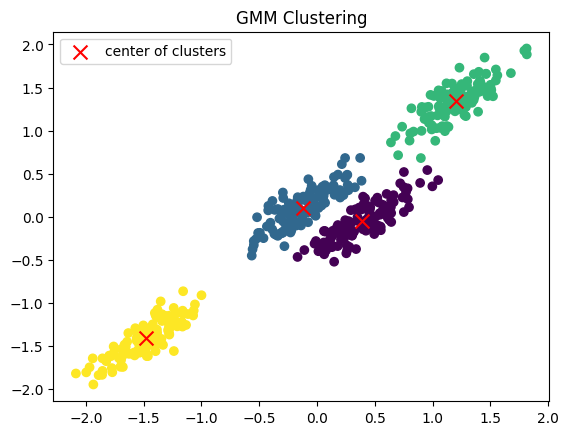

In [25]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_assignments)
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], marker='x', color='red', s=100, label='center of clusters')
plt.title('GMM Clustering')
plt.legend()
plt.show()